## Mathematical explanation PCA

Let's say we have the following general dataset of $n$ samples and $3$ features (dimensions):

\begin{equation}
X =
\begin{bmatrix}
    x_1  & y_1 & z_1  \\
    x_2  & y_2 & z_2  \\
    \vdots & \vdots & \vdots \\
    x_n  & y_n & z_n  \\
\end{bmatrix}
\end{equation}

**Step 1** of calculating the principal components of this dataset is to center and scale the data:

\begin{equation}
\hat{X} =
\frac{(X - \overline{X})}{\sigma_X} =
    \left(
    \begin{bmatrix}
    x_1  & y_1 & z_1  \\
    x_2  & y_2 & z_2  \\
    \vdots & \vdots & \vdots \\
    x_n  & y_n & z_n  \\
    \end{bmatrix}
    -
    \begin{bmatrix}
    \overline{x}  & \overline{y}  & \overline{z}   \\
    \overline{x}  & \overline{y}  & \overline{z}   \\
    \vdots & \vdots & \vdots \\
    \overline{x}  & \overline{y}  & \overline{z}   \\
    \end{bmatrix}
    \right)
    \div
    \begin{bmatrix}
    \sigma_x  & \sigma_y  & \sigma_z   \\
    \sigma_x  & \sigma_y  & \sigma_z   \\
    \vdots & \vdots & \vdots \\
    \sigma_x  & \sigma_y  & \sigma_z   \\
    \end{bmatrix}
\end{equation}


The reason that centering and scaling of the data is important is due to the fact that, later, the covariance matrix of the data $X$ will be decomposed into it's eigenvectors. Since the covariance between 2 variables is in essence some sort of sum of a product of a pair of distances (distance from variable mean), the scale of the variable becomes very important. If no scaling is applied, then variables which have a natural larger scale will result automatically in larger (co-)variances, even if the extent to which the 2 variables change together (definition of covariance) is small.

**Step 2** is calulating the covariance matrix of $\hat{X}$. The covariance between two variables is defined as follows:

\begin{equation}
\tag{3}
COV(x, y) = \frac{\sum^n_{i=1} (x_i - \overline{x} ) (y_i - \overline{y})}{n}
\end{equation}

In matrix notation this then becomes (good exercise to check this):

\begin{equation}
\tag{4}
COV(\hat{X}) = \frac{1}{n} \cdot \hat{X}^T \hat{X}
\end{equation}

Which yields a 3x3 covariance matrix in our example:

\begin{equation}
COV(\hat{X}) =
\begin{bmatrix}
  VAR(x)  & COV(x, y)  & COV(x, z) \\
  COV(y, x) & VAR(y) & COV(y, z) \\
  COV(z, x) & COV(z, y)  & VAR(z)
\end{bmatrix}
\tag{5}
\end{equation}

**Step 3** is then performing a singular value decomposition of the covariance matrix to obtain the eigenvectors and eigenvalues. The eigenvalue problem is defined as

\begin{equation}
\tag{6}
\hat{X} \cdot v = \lambda \cdot v
\end{equation}

which can be rewritten as
\begin{equation}
\tag{7}
(\hat{X} - \lambda I) \cdot v = 0
\end{equation}

if $v$ is non-zero, this equation will only have a solution if

\begin{equation}
\tag{8}
|\hat{X} - \lambda I| = 0
\end{equation}

Solving this ($n^{th}$ order) polynomial equation yields us the eigenvalues $\lambda$. With $\lambda$ and Equation 7 we can now solve for the eigenvectors $v_1, v_2, v_3$.

$$
v =
\left[
\begin{array}{ccc}
v_{1,a} & v_{2,a} & v_{3,a} \\
v_{1,b} & v_{2,b} & v_{3,b} \\
v_{1,c} & v_{2,c} & v_{3,c} \\
\end{array}
\right]
$$


**Step 4** includes ordering the eigenvectors (principal components) according to the size of the corresponding eigenvalues, where eigenvectors with a higher eigenvalue explain more of the variance in the data.

**Step 5** then includes picking a subset of eigenvectors ($v' \in v$) to use for transforming the samples into the new subspace, where the number of eigenvectors determines the number of dimensions the data is reduced to. For example, we could take the first 2 eigenvectors:

$$
v' =
\left[
\begin{array}{cc}
v_{1,a} & v_{2,a} \\
v_{1,b} & v_{2,b} \\
v_{1,c} & v_{2,c} \\
\end{array}
\right]
$$

**Step 6** is the final step where we use the eigenvectors to transform/project the data $\hat{X}$ to a lower dimensional representation $\chi$. In this case that would result in a dimensional reduction from $n$ x $3$ to $n$ x $2$

\begin{equation}
\chi =
\left(
  \begin{bmatrix}
  v_{1,a} & v_{1,b} & v_{1,c} \\
  v_{2,a} & v_{2,b} & v_{2,c} \\
  \end{bmatrix}

  \cdot

  \begin{bmatrix}
  \hat{x}_1  & \hat{x}_2 & \cdots & \hat{x}_n  \\
  \hat{y}_1  & \hat{y}_2 & \cdots & \hat{y}_n  \\
  \hat{z}_1  & \hat{z}_2 & \cdots & \hat{z}_n  \\
  \end{bmatrix}
\right)^T
\end{equation}

After performing the matrix multiplication and taking the transpose, the resulting matrix $\chi$ is:

\begin{equation}
\chi =
\begin{bmatrix}
  \chi_{1,1}  & \chi_{2,1} & \cdots & \chi_{n,1} \\
  \chi_{1,2}  & \chi_{2,2} & \cdots & \chi_{n,2} \\
\end{bmatrix}
\end{equation}


All these steps combined result in the following Python function that determines the Principal Components for a dataset

In [1]:
# Load very simple dataset
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [2]:
import numpy as np

def PCA(X , num_components):

    #Step-1, centering and scaling
    X_scaled = (X - np.mean(X , axis = 0))/ np.std(X, axis=0)

    #Step-2, computation of the covariance matrix
    cov_mat = np.cov(X_scaled , rowvar = False)

    #Step-3, calculate eigenvectors and eigenvalues of covariance matrix
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    #Step-4, order the eigenvectors according to the size of the corresponding eigenvalues
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    #Step-5, select subset of eigenvectors (# of principal components)
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]

    #Step-6, transform data to reduced dataset
    X_reduced = np.dot(eigenvector_subset.transpose() , X_scaled.transpose() ).transpose()

    return X_reduced


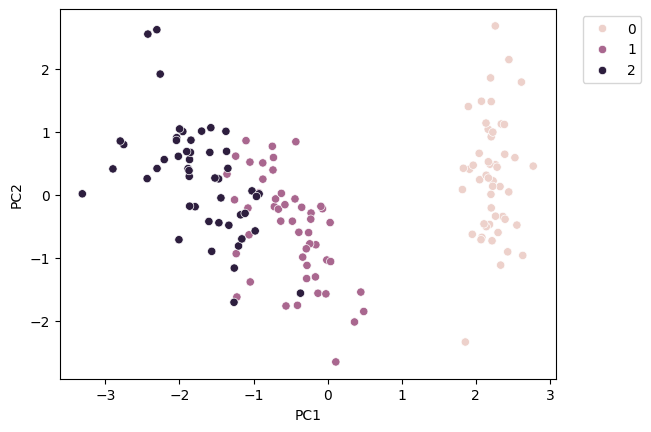

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

n = 2
pca_iris = PCA(X, n)

pca_df = pd.DataFrame(data=pca_iris, columns=['PC{}'.format(i+1) for i in range(n)])
# Add labels to df
pca_df['label'] = y

sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="label")
plt.legend(bbox_to_anchor=(1.04, 1))
plt.show()

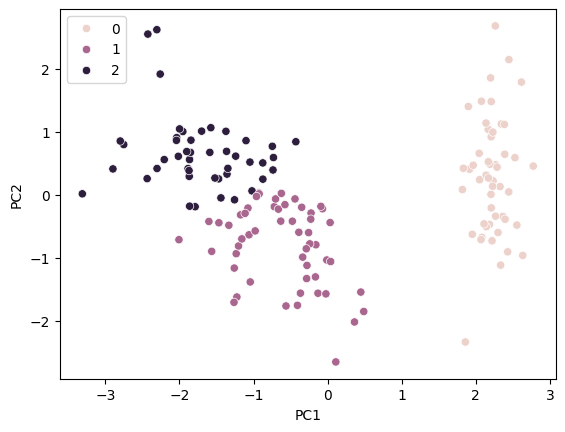

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(pca_iris)

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=kmeans.labels_)
plt.show()

This notebook was created based on the examples and explanations from the following blog posts:

https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643

https://www.askpython.com/python/examples/principal-component-analysis